In [1]:
!pip install torch torchvision torchaudio
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9ivb1iij
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9ivb1iij
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=340ae90afcf8c69363b5364dd4f13e5bb04d1dd43a9e806853c3a842cfeaf24b
  Stored in directory: /tmp/pip-ephem-wheel-cache-te77e06l/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import torch

# Inicializar el modelo SAM
sam_checkpoint = '/content/drive/Othercomputers/Mi PC/Master IA/Practicas Empresa/Imagen/taza_dataset_angle/PY_video_to_dataset/sam_vit_h_4b8939.pth'  # Ruta al modelo preentrenado de SAM
model_type = "vit_h"  # Tipo de modelo
device = "cuda" if torch.cuda.is_available() else "cpu"

# Cargar el modelo
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

# Crear un generador de máscaras
mask_generator = SamAutomaticMaskGenerator(sam)

# Función para realizar la segmentación
def segment_image(image_path):
    # Cargar la imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Generar las máscaras
    masks = mask_generator.generate(image_rgb)

    return image_rgb, masks

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


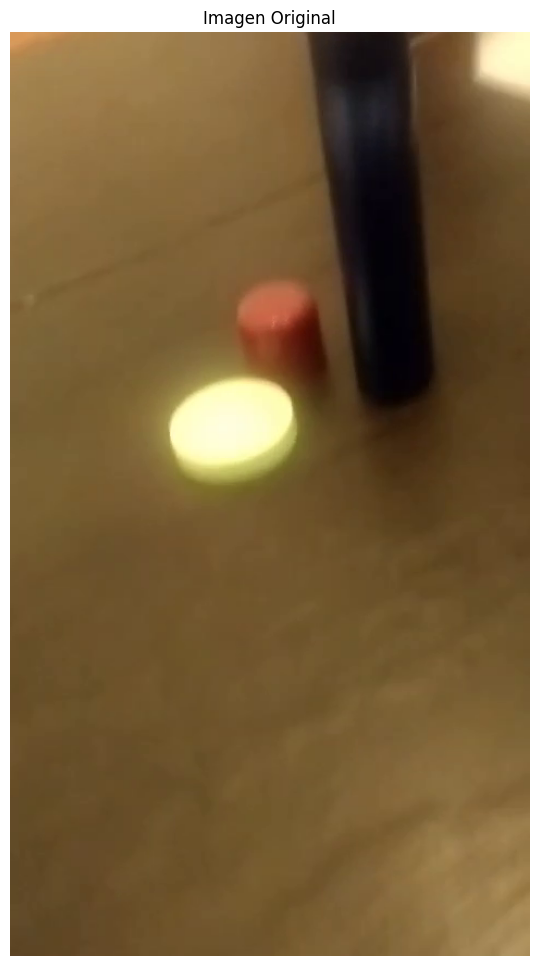

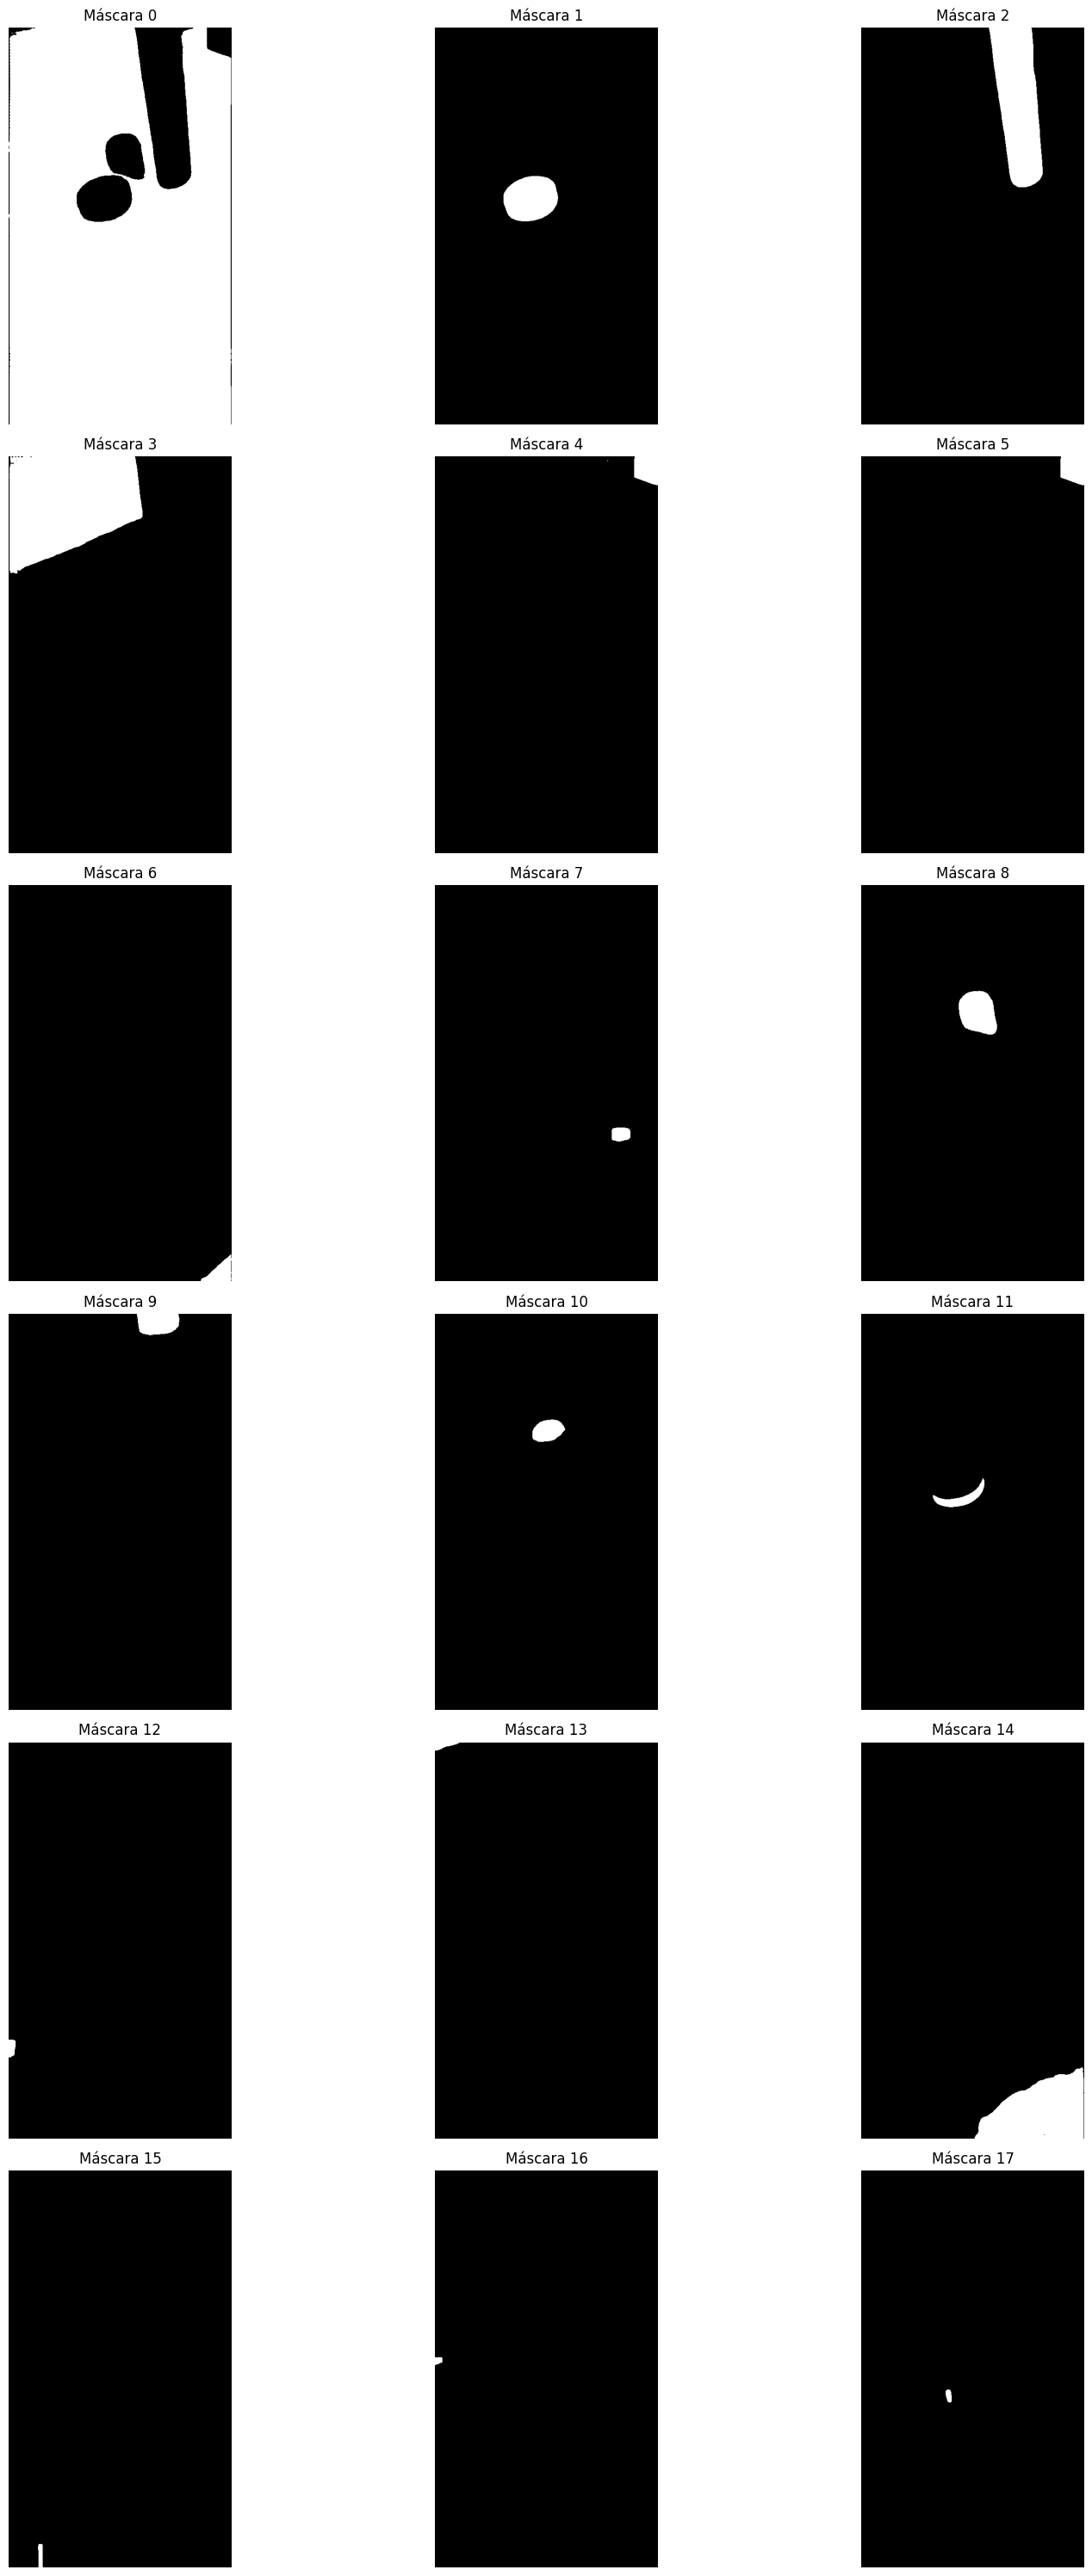

In [143]:
# Ruta de la imagen que quieres segmentar
image_path = '/content/drive/Othercomputers/Mi PC/Master IA/Practicas Empresa/Imagen/taza_dataset_angle/Feature_img/capturas/figura6_frame_68.png'

# Segmentación de la imagen
original_image, masks = segment_image(image_path)

# Visualización de la imagen original
plt.figure(figsize=(12, 12))
plt.subplot(1, 1, 1)
plt.title('Imagen Original')
plt.imshow(original_image)
plt.axis('off')

# Mostrar todas las máscaras generadas
num_masks = len(masks)
plt.figure(figsize=(15, 5 * (num_masks // 3 + 1)))

for i, mask in enumerate(masks):
    plt.subplot((num_masks // 3) + 1, 3, i + 1)
    plt.imshow(mask['segmentation'], cmap='gray')
    plt.title(f'Máscara {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Valores únicos en la primera máscara: [0, 1]


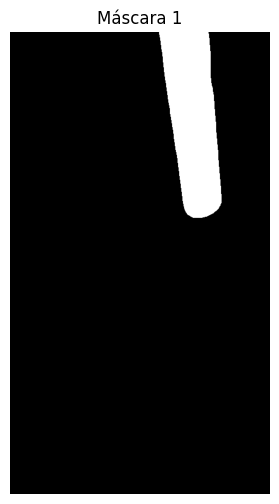

Máscara guardada en /content/drive/Othercomputers/Mi PC/Master IA/Practicas Empresa/Imagen/taza_dataset_angle/Feature_img/mascaras/figura6_frame_68_mask1.png


In [144]:
# Cargar la primera máscara desde el objeto masks
mask_1 = masks[2]['segmentation']  # Supongamos que esta es la máscara que ya tienes

mask_1 = mask_1.astype(np.uint8)  # Asegúrate de que sea del tipo correcto

mask_3 = masks[0]['segmentation']
mask_3 = mask_3.astype(np.uint8)  # Asegúrate de que sea del tipo correcto or mask_3[i, j] ==1

# Cargar la segunda máscara desde el archivo
image_to_concat_path = '/content/drive/Othercomputers/Mi PC/Master IA/Practicas Empresa/Imagen/taza_dataset_angle/Feature_img/mascaras/figura6_frame_68_mask1.png'

# Función para obtener valores únicos de píxeles
def get_unique_pixel_values(mask):
    unique_values = set(mask.flatten())  # Aplana la máscara y usa un conjunto para valores únicos
    return sorted(unique_values)  # Devuelve los valores ordenados

# Obtener valores únicos de píxeles para ambas máscaras
unique_values_mask_1 = get_unique_pixel_values(mask_1)
print(f"Valores únicos en la primera máscara: {unique_values_mask_1}")


combined_mask = np.zeros_like(mask_1)  # Inicializar la máscara combinada con ceros
# Iterar sobre cada píxel
for i in range(mask_1.shape[0]):
    for j in range(mask_3.shape[1]):
        # Si el píxel en cualquiera de las dos máscaras es blanco, poner blanco en la máscara combinada
        if mask_1[i, j] == 1:
            combined_mask[i, j] = 255

# Visualización de las máscaras
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.imshow(combined_mask, cmap='gray')
plt.title('Máscara 1')
plt.axis('off')
plt.show()

# Guardar la máscara combinada
cv2.imwrite(image_to_concat_path, combined_mask)
print(f'Máscara guardada en {image_to_concat_path}')
